Acetaminophen exposures in prior year          Urinary tract infectious disease in prior year
Occurrence of Alcoholism in prior year               Antibiotics Oxazolidinones in prior year
Anemia in prior year                                     predicted risk of Pulmonary Embolism
Angina events in prior year                 Type 1 diabetes and no prior specific non-T1DM...
ANTIEPILEPTICS in prior year                          predicted risk of Restless Leg Syndrome
                                                                  ...                        
Antibiotics Polypeptides in prior year                     Heart valve disorder in prior year
Antibiotics Rifamycins in prior year                    Antibiotics Penicillins in prior year
Antibiotics Sulfonamides in prior year                        Aspirin exposures in prior year
Antibiotics Streptogramins in prior year       Urinary tract infectious disease in prior year
Antibiotics Tetracyclines in prior year     predicted risk o

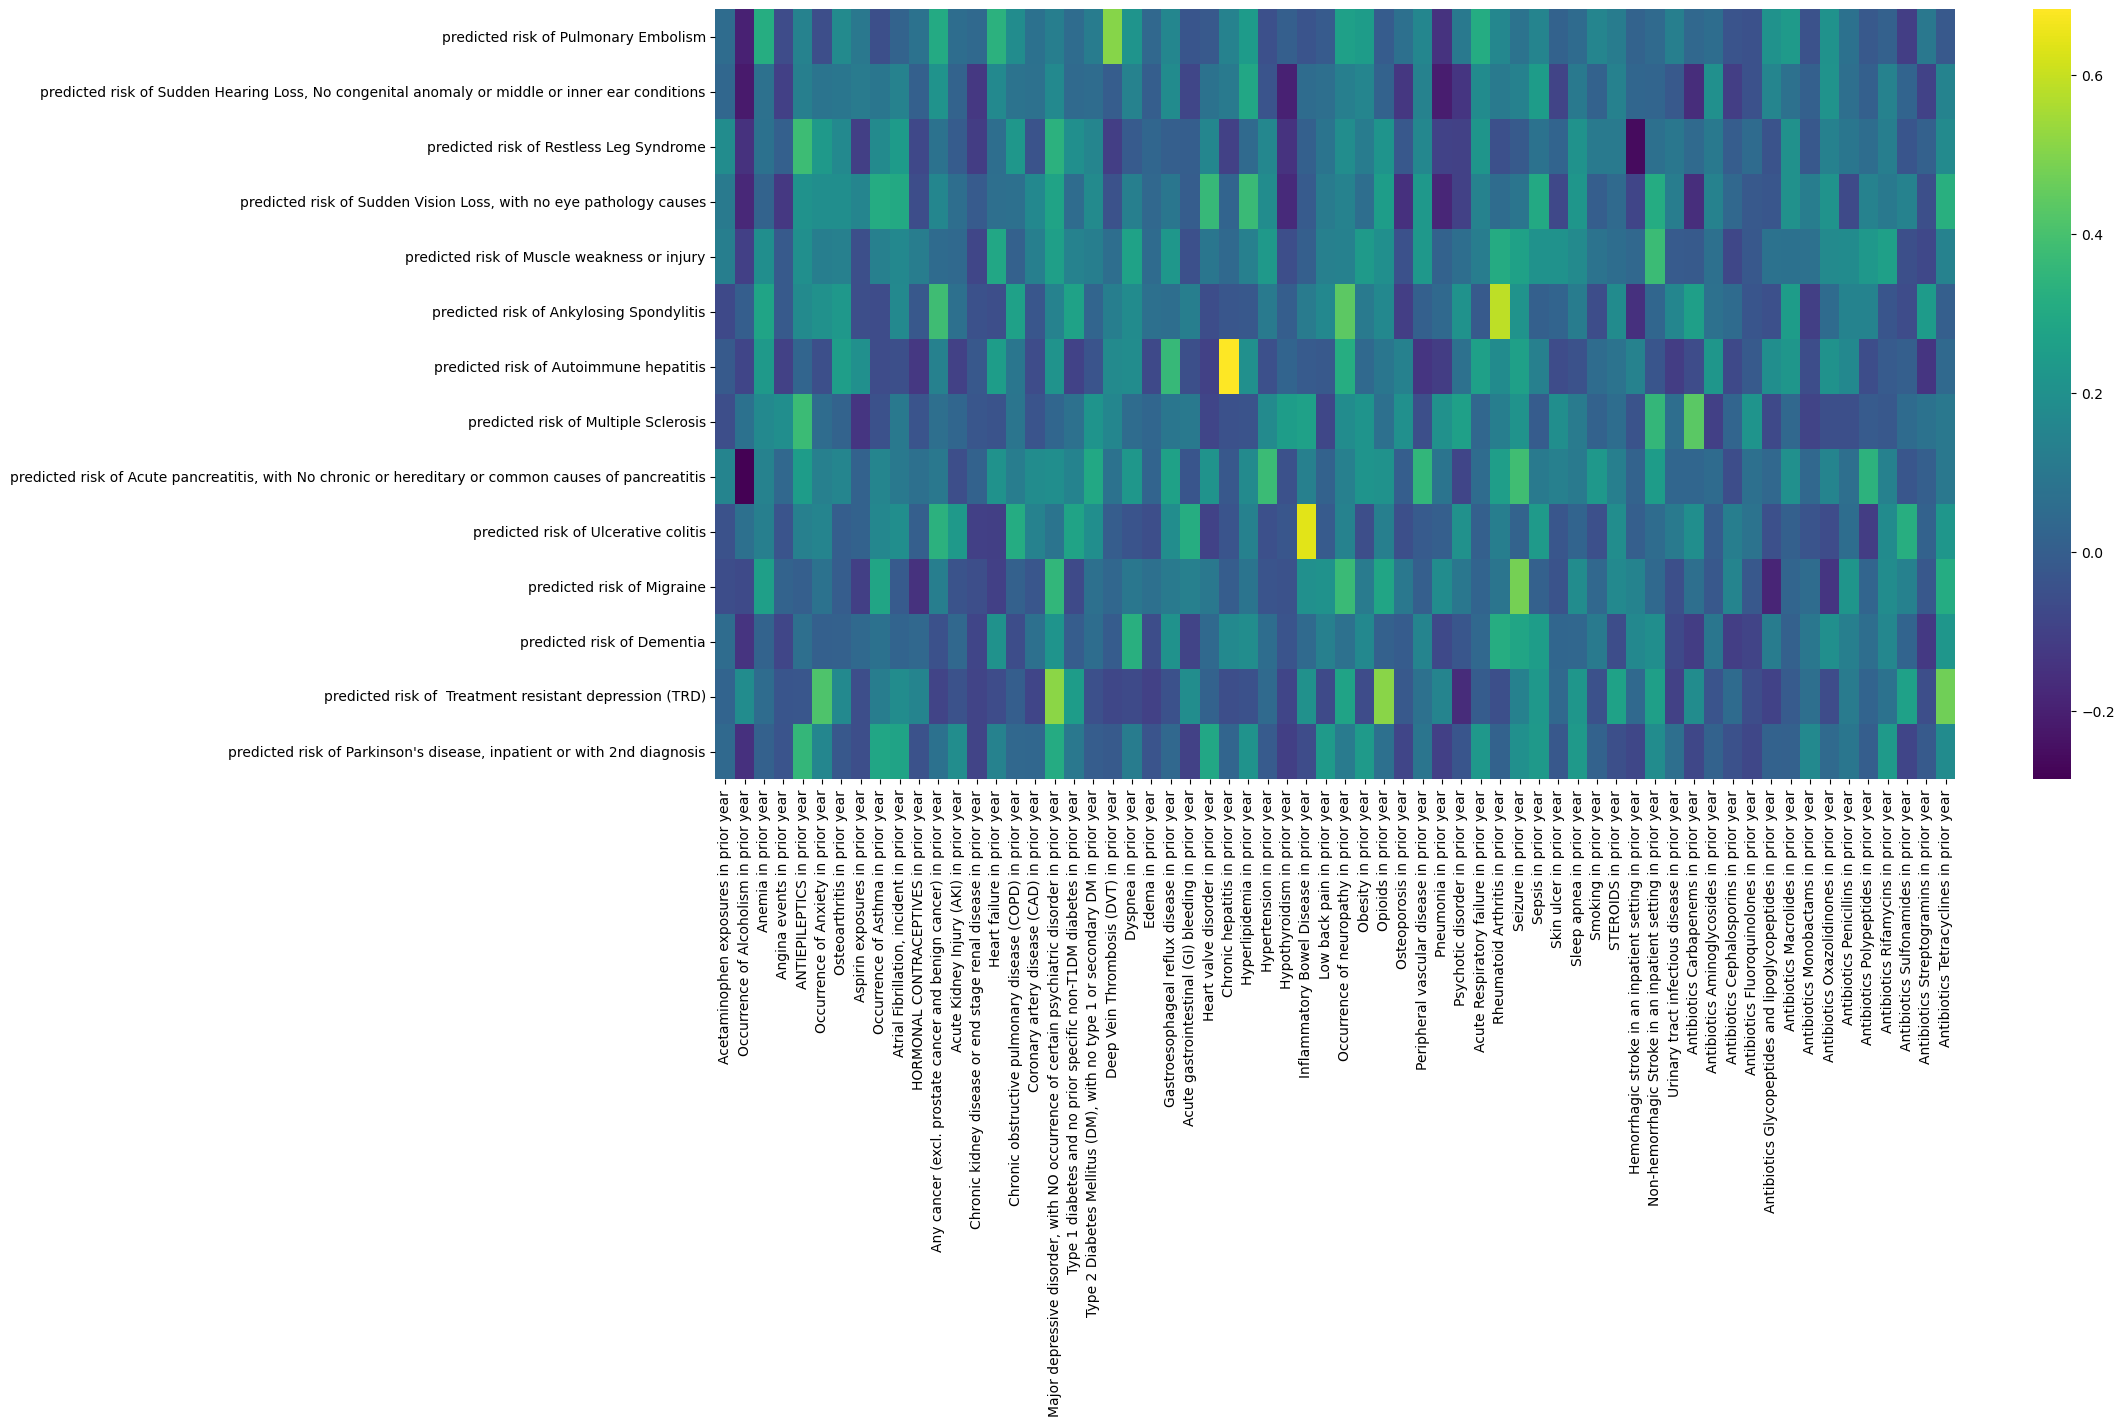

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import IPython.display as ipd

factors_preds = pd.read_csv('factors_preds.csv')
factors_preds = factors_preds.drop('personId',axis=1)
factors_data = pd.read_csv('factors_data.csv')
factors_data = factors_data.drop('personId', axis=1)

use_factors_preds = factors_preds.copy()
factor_pred_corrs = use_factors_preds.corr('pearson') #shows correlations between columns based on the Pearson correlation coefficient 
factor_pred_corrs = factor_pred_corrs.drop(factors_preds.iloc[:,-14:].columns.values, axis=1) #dropping the prediction data in one axis
#so axis 0 now has factor and prediction data, axis 1 has factor data only 
factor_pred_corrs.replace(1.000000, np.nan, inplace=True) #so that when finding max, these values (correlation to itself) can be skipped
print(factor_pred_corrs.idxmax()) #shows the highest correlation for each of the variables (including measuring the factors against each other)
factor_pred_corrs_1v1 = factor_pred_corrs.drop(factors_data.columns.values, axis=0) #dropping the factors data in one axis
#so axis 0 now has prediction data only, axis 1 has factor data only
fvf_corrs = factor_pred_corrs.drop(factors_preds.iloc[:,-14:].columns.values, axis=0) #dropping the prediction data in the other axis
#this now contains only factors data in both axes and their correlation coefficients as values

#this code block is saving the highest correlated factors and predicted risks as a dataframe
max_corrs = factor_pred_corrs.idxmax().to_frame().reset_index()
max_corrs_2 = factor_pred_corrs_1v1.idxmax().to_frame().reset_index()
max_corrs = max_corrs.merge(max_corrs_2, on='index').rename(columns={'index':'Factor','0_x':'Strongest correlation (factors and predicted risk)','0_y':'Strongest correlation (predicted risk only)'})
max_corrs.to_csv('max_correlations.csv')


fig = plt.figure(figsize=(20,10))
ax = plt.axes()

sns.heatmap(factor_pred_corrs_1v1,cmap='viridis',xticklabels=factors_data.columns.values,ax=ax)
plt.savefig('heatmap_factors_preds')
#this shows the correlations between each of the 'prior year' factors and each of the predicted risks

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()

sns.heatmap(fvf_corrs, cmap='viridis', xticklabels=factors_data.columns, yticklabels=factors_data.columns)
plt.savefig('heatmap_factors_factors')
#this shows the correlations between each of the 'prior year' factors